<a href="https://colab.research.google.com/github/YJWang1973/LHT1/blob/master/training_preocess_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import numpy as np
import keras
from keras.callbacks import EarlyStopping
from scipy import io
import os
import tensorflow as tf
from sklearn import linear_model
from sklearn import datasets
from sklearn import metrics
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense, BatchNormalization, PReLU, LeakyReLU, Activation, ReLU, LSTM, Softmax
from keras.models import Sequential
from keras.utils import np_utils
from keras.utils import plot_model
from sklearn.preprocessing import scale
from sklearn import model_selection

In [0]:

training_data = io.loadmat("LHT1/Neural_in_all.mat")['Neural_in_matrix']
training_label = io.loadmat("LHT1/DS_all.mat")['DS_matrix']

In [0]:
def spliter(vec, cluster):
    res = []
    l = len(vec)/2
    r = int(len(vec)/cluster)
    for i in range(int(r/2)):
        ans = []
        
        for j in range(cluster):
            ans += [vec[j+i]]
            
        for j in range(cluster):
            ans += [vec[j+i+int(l)]]        
        res += [ans]
        
        
    return np.array(res)

In [0]:
def agg_maker(matrix, cluster):
    aggre = spliter(matrix[0], cluster)
    for i in range(1, matrix.shape[0]):
        aggre = np.concatenate([aggre, spliter(matrix[i], cluster)])
        
    return aggre

In [0]:
aggre_train = agg_maker(training_data, 3)

In [0]:
aggre_label = training_label.flatten()

In [0]:
from sklearn import preprocessing
rg = 4000
scaler = preprocessing.MinMaxScaler()
scaler = scaler.fit(aggre_train[0:rg])
scaled_aggre_train = scaler.transform(aggre_train[0:rg])

In [40]:
scaled_aggre_train.shape

(4000, 6)

In [41]:
Raw = Input(shape = (aggre_train.shape[1], ))
Dense_K1 = Dense(units = 16, activation = 'relu')(Raw)
Dense_K2 = Dense(units = 64, activation = 'relu')(Dense_K1)
Dense_K3 = Dense(units = 32, activation = 'relu')(Dense_K2)
# Out = Dense(units = training_label.shape[1], activation = 'sigmoid')(PR_K3)
Out = Dense(units = 1, activation = 'relu')(Dense_K3)


adam = optimizers.Adam(lr = 0.001)
model_new = Model(inputs = Raw, outputs = Out)
model_new.compile(loss = 'mse', optimizer = 'rmsprop')
# early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 2)
model_new.fit(scaled_aggre_train, aggre_label[0:rg], 
              epochs = 1000, batch_size = 4)








Epoch 1/1000





4000/4000 [==============================] - 2s 376us/step - loss: 3.2728
Epoch 2/1000
4000/4000 [==============================] - 1s 248us/step - loss: 2.9507
Epoch 3/1000
4000/4000 [==============================] - 1s 245us/step - loss: 2.8898
Epoch 4/1000
4000/4000 [==============================] - 1s 253us/step - loss: 2.8452
Epoch 5/1000
4000/4000 [==============================] - 1s 252us/step - loss: 2.8307
Epoch 6/1000
4000/4000 [==============================] - 1s 257us/step - loss: 2.8083
Epoch 7/1000
4000/4000 [==============================] - 1s 260us/step - loss: 2.7797
Epoch 8/1000
4000/4000 [==============================] - 1s 256us/step - loss: 2.7945
Epoch 9/1000
4000/4000 [==============================] - 1s 252us/step - loss: 2.7717
Epoch 10/1000
4000/4000 [==============================] - 1s 253us/step - loss: 2.7792
Epoch 11/1000
4000/4000 [==============================] - 1s 252us/step - loss: 2.7492
Epoch 12/1000
4000/4000 [====

KeyboardInterrupt: ignored

In [0]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

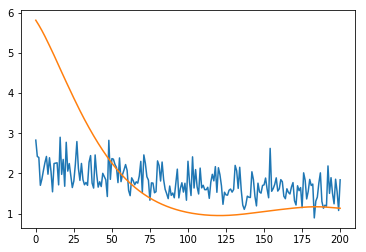

In [0]:
plt.plot(model_new.predict(scaled_aggre_train[0:201]))
plt.plot(aggre_label[0:201])

In [15]:
! git clone https://github.com/YJWang1973/LHT1.git

Cloning into 'LHT1'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [19]:
! ls

cats_and_dogs_small  LHT1  sample_data


In [27]:
! cd /LHT1



/bin/bash: line 0: cd: /LHT1: No such file or directory


In [26]:
! ls

cats_and_dogs_small  LHT1  sample_data


In [32]:
io.loadmat("LHT1/Neural_in_all.mat")

{'Neural_in_matrix': array([[ 1.83787401e-05, -2.06520537e-05,  2.22760613e-05, ...,
         -4.72455093e-05,  4.45498070e-05,  1.25651690e-05],
        [-6.81535171e-06, -1.33070174e-05, -1.17799121e-05, ...,
         -3.59289395e-05, -3.79160052e-06,  6.28905886e-05],
        [-1.54923712e-04, -2.24058268e-04, -3.46186114e-04, ...,
          1.73520635e-04,  8.16470693e-05, -1.53704032e-04],
        ...,
        [-8.10809502e-06,  1.78646825e-04,  4.04820310e-05, ...,
         -1.03032353e-05,  1.56583619e-05,  2.56191864e-05],
        [ 1.68024993e-04,  1.30477037e-04, -1.08804997e-04, ...,
         -1.47797949e-06, -5.63481042e-06, -3.47550903e-06],
        [-3.05561364e-05,  1.12020370e-04,  1.09688256e-05, ...,
         -7.65660883e-05,  1.01030298e-04,  9.57376355e-05]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jan  3 19:29:25 2020',
 '__version__': '1.0'}

In [33]:
io.loadmat("LHT1/DS_all.mat")

{'DS_matrix': array([[5.80874248, 5.74960607, 5.68728629, ..., 1.14072002, 1.13727397,
         1.13371152],
        [2.15283928, 2.12685393, 2.10081165, ..., 1.07635403, 1.07221181,
         1.06797033],
        [0.57633589, 0.5670873 , 0.55798908, ..., 0.57988952, 0.57348693,
         0.56708106],
        ...,
        [1.43617004, 1.42481906, 1.41352278, ..., 1.74561428, 1.75168368,
         1.75772107],
        [0.85944294, 0.86518706, 0.87091341, ..., 1.39035482, 1.38811295,
         1.38595962],
        [0.97911589, 0.97107543, 0.96315221, ..., 0.50623934, 0.50386432,
         0.50189357]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Jan  3 19:37:30 2020',
 '__version__': '1.0'}